In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [524]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 6]
sns.set()

In [525]:
trees_cover = pd.read_csv('Treescover loss - yearly.csv', parse_dates = False, index_col = 'umd_tree_cover_loss__year')
trees_cover = trees_cover.drop(['whrc_aboveground_biomass_loss__Mg','whrc_aboveground_co2_emissions__Mg'], 1)
trees_cover

,umd_tree_cover_loss__ha
umd_tree_cover_loss__year,
2001,1943318.744
2002,2038435.691
2003,1649383.910
2004,2746257.288
2005,2691544.211
2006,2605855.554
2007,2435127.980
2008,2213723.495
2009,1608980.963


In [526]:
idx = pd.date_range("2000", periods=20, freq="Y")
idx += np.timedelta64(1,'D')
idx

DatetimeIndex(['2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [527]:
df = pd.Series(list(trees_cover["umd_tree_cover_loss__ha"])+[0],index=idx)
df

2001-01-01    1943318.744
2002-01-01    2038435.691
2003-01-01    1649383.910
2004-01-01    2746257.288
2005-01-01    2691544.211
2006-01-01    2605855.554
2007-01-01    2435127.980
2008-01-01    2213723.495
2009-01-01    1608980.963
2010-01-01    2167662.188
2011-01-01    1663692.304
2012-01-01    1964094.349
2013-01-01    1736445.498
2014-01-01    1736526.807
2015-01-01    2289649.128
2016-01-01    2264066.750
2017-01-01    2311358.030
2018-01-01    2092359.472
2019-01-01    2109918.283
2020-01-01          0.000
Freq: AS-JAN, dtype: float64

In [528]:
upsampled_df = df.resample('Q').ffill()#[:991]
upsampled_df.drop(upsampled_df.tail(1).index,inplace=True)
upsampled_df

2001-03-31    1943318.744
2001-06-30    1943318.744
2001-09-30    1943318.744
2001-12-31    1943318.744
2002-03-31    2038435.691
                 ...     
2018-12-31    2092359.472
2019-03-31    2109918.283
2019-06-30    2109918.283
2019-09-30    2109918.283
2019-12-31    2109918.283
Freq: Q-DEC, Length: 76, dtype: float64

In [529]:
sigma = upsampled_df.std()
mu = 0 # mean and standard deviation
variations = np.random.normal(mu, sigma*np.sqrt(1/4), 76)

In [530]:
upsampled_df_series = pd.DataFrame.to_numpy(upsampled_df).flatten()
upsampled_df_series = upsampled_df_series + variations
upsampled_df = upsampled_df.to_frame()
upsampled_df = upsampled_df.rename(columns = {0:'umd_tree_cover_loss__ha'})
upsampled_df

,umd_tree_cover_loss__ha
2001-03-31,1943318.744
2001-06-30,1943318.744
2001-09-30,1943318.744
2001-12-31,1943318.744
2002-03-31,2038435.691
...,...
2018-12-31,2092359.472
2019-03-31,2109918.283
2019-06-30,2109918.283
2019-09-30,2109918.283


In [531]:
idx = pd.date_range("2001", periods=76, freq="Q")
idx = idx.shift(-3,'M')
idx += np.timedelta64(1,'D')
idx

DatetimeIndex(['2001-01-01', '2001-04-01', '2001-07-01', '2001-10-01',
               '2002-01-01', '2002-04-01', '2002-07-01', '2002-10-01',
               '2003-01-01', '2003-04-01', '2003-07-01', '2003-10-01',
               '2004-01-01', '2004-04-01', '2004-07-01', '2004-10-01',
               '2005-01-01', '2005-04-01', '2005-07-01', '2005-10-01',
               '2006-01-01', '2006-04-01', '2006-07-01', '2006-10-01',
               '2007-01-01', '2007-04-01', '2007-07-01', '2007-10-01',
               '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
               '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
      

In [532]:
upsampled_df['umd_tree_cover_loss__ha']  = upsampled_df_series
upsampled_df

,umd_tree_cover_loss__ha
2001-03-31,1.946291e+06
2001-06-30,1.708446e+06
2001-09-30,1.871964e+06
2001-12-31,2.102076e+06
2002-03-31,2.131341e+06
...,...
2018-12-31,2.298161e+06
2019-03-31,2.266676e+06
2019-06-30,1.875025e+06
2019-09-30,2.068613e+06


In [533]:
# upsampled_df = upsampled_df.append({'umd_tree_cover_loss__ha' : 0}, ignore_index = True)
upsampled_df.index = idx
upsampled_df

,umd_tree_cover_loss__ha
2001-01-01,1.946291e+06
2001-04-01,1.708446e+06
2001-07-01,1.871964e+06
2001-10-01,2.102076e+06
2002-01-01,2.131341e+06
...,...
2018-10-01,2.298161e+06
2019-01-01,2.266676e+06
2019-04-01,1.875025e+06
2019-07-01,2.068613e+06


In [534]:
upsampled_df = upsampled_df.resample('M').ffill()#[:991]
# upsampled_df.drop(upsampled_df.tail(1).index,inplace=True)
upsampled_df

,umd_tree_cover_loss__ha
2001-01-31,1.946291e+06
2001-02-28,1.946291e+06
2001-03-31,1.946291e+06
2001-04-30,1.708446e+06
2001-05-31,1.708446e+06
...,...
2019-06-30,1.875025e+06
2019-07-31,2.068613e+06
2019-08-31,2.068613e+06
2019-09-30,2.068613e+06


In [535]:
for __ in range(2):
    upsampled_df = upsampled_df.append(upsampled_df.iloc[-1])
upsampled_df

,umd_tree_cover_loss__ha
2001-01-31,1.946291e+06
2001-02-28,1.946291e+06
2001-03-31,1.946291e+06
2001-04-30,1.708446e+06
2001-05-31,1.708446e+06
...,...
2019-08-31,2.068613e+06
2019-09-30,2.068613e+06
2019-10-31,2.150625e+06
2019-10-31,2.150625e+06


In [536]:
idx = pd.date_range("2000", periods=240, freq="M")

idx += np.timedelta64(1,'D')
# idx = idx.shift(-1,'M')
idx = idx[11:-1]

In [537]:
upsampled_df.index = idx
upsampled_df

,umd_tree_cover_loss__ha
2001-01-01,1.946291e+06
2001-02-01,1.946291e+06
2001-03-01,1.946291e+06
2001-04-01,1.708446e+06
2001-05-01,1.708446e+06
...,...
2019-08-01,2.068613e+06
2019-09-01,2.068613e+06
2019-10-01,2.150625e+06
2019-11-01,2.150625e+06


In [538]:
# from datetime import datetime
# upsampled_df.index = pd.to_datetime(upsampled_df.index, format = '%Y-%m-%d').strftime('%Y-%m')
# # datetime.strptime(str(upsampled_df.index), '%Y-%m-%d').strftime('%Y-%m')
# upsampled_df

In [539]:
upsampled_df = upsampled_df.resample('W').ffill()#[:991]
# upsampled_df.drop(upsampled_df.tail(1).index,inplace=True)
upsampled_df

,umd_tree_cover_loss__ha
2001-01-07,1.946291e+06
2001-01-14,1.946291e+06
2001-01-21,1.946291e+06
2001-01-28,1.946291e+06
2001-02-04,1.946291e+06
...,...
2019-11-03,2.150625e+06
2019-11-10,2.150625e+06
2019-11-17,2.150625e+06
2019-11-24,2.150625e+06


In [540]:
for __ in range(4):
    upsampled_df = upsampled_df.append(upsampled_df.iloc[-1])
upsampled_df

,umd_tree_cover_loss__ha
2001-01-07,1.946291e+06
2001-01-14,1.946291e+06
2001-01-21,1.946291e+06
2001-01-28,1.946291e+06
2001-02-04,1.946291e+06
...,...
2019-12-01,2.150625e+06
2019-12-01,2.150625e+06
2019-12-01,2.150625e+06
2019-12-01,2.150625e+06


In [541]:
idx = pd.date_range("2001", periods=991, freq="W")
# idx = idx.shift(-3,'M')
# idx += np.timedelta64(1,'D')
idx

DatetimeIndex(['2001-01-07', '2001-01-14', '2001-01-21', '2001-01-28',
               '2001-02-04', '2001-02-11', '2001-02-18', '2001-02-25',
               '2001-03-04', '2001-03-11',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', length=991, freq='W-SUN')

In [542]:
upsampled_df.index = idx
upsampled_df

,umd_tree_cover_loss__ha
2001-01-07,1.946291e+06
2001-01-14,1.946291e+06
2001-01-21,1.946291e+06
2001-01-28,1.946291e+06
2001-02-04,1.946291e+06
...,...
2019-12-01,2.150625e+06
2019-12-08,2.150625e+06
2019-12-15,2.150625e+06
2019-12-22,2.150625e+06


In [543]:
sigma = upsampled_df.std()
mu = 0 # mean and standard deviation
variations = np.random.normal(mu, sigma*np.sqrt(1/4), 991)

In [544]:
upsampled_series = pd.DataFrame.to_numpy(upsampled_df).flatten()
upsampled_series = upsampled_series + variations

In [545]:
upsampled_df['umd_tree_cover_loss__ha']  = upsampled_series
upsampled_df

,umd_tree_cover_loss__ha
2001-01-07,1.932323e+06
2001-01-14,2.174659e+06
2001-01-21,2.335532e+06
2001-01-28,2.065546e+06
2001-02-04,1.989476e+06
...,...
2019-12-01,2.173872e+06
2019-12-08,2.458220e+06
2019-12-15,1.946026e+06
2019-12-22,2.230631e+06


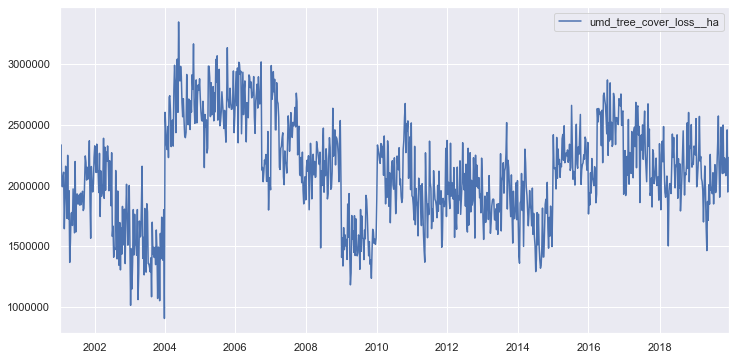

In [546]:
upsampled_df.plot.line()

In [547]:
upsampled_df_01_08 = upsampled_df[:417]
upsampled_df_01_08

,umd_tree_cover_loss__ha
2001-01-07,1.932323e+06
2001-01-14,2.174659e+06
2001-01-21,2.335532e+06
2001-01-28,2.065546e+06
2001-02-04,1.989476e+06
...,...
2008-11-30,2.254337e+06
2008-12-07,2.031385e+06
2008-12-14,2.397440e+06
2008-12-21,2.535053e+06


In [548]:
upsampled_df_09_19 = upsampled_df[417:]
upsampled_df_09_19

,umd_tree_cover_loss__ha
2009-01-04,1.406958e+06
2009-01-11,1.567991e+06
2009-01-18,1.336298e+06
2009-01-25,1.652557e+06
2009-02-01,1.470782e+06
...,...
2019-12-01,2.173872e+06
2019-12-08,2.458220e+06
2019-12-15,1.946026e+06
2019-12-22,2.230631e+06


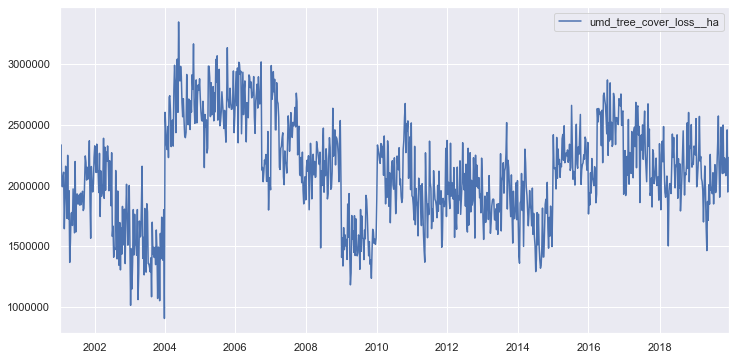

In [549]:
upsampled_df.plot.line()

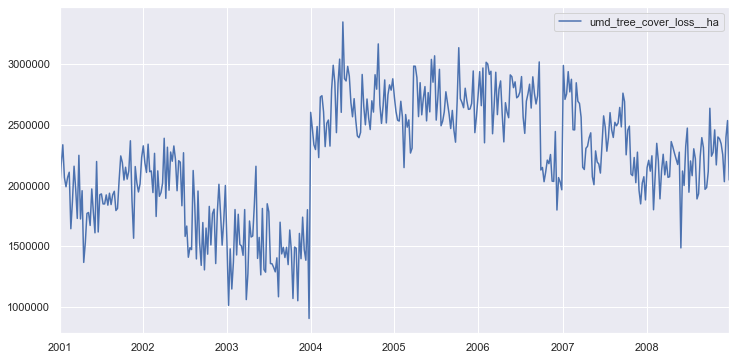

In [556]:
upsampled_df_01_08.plot.line()

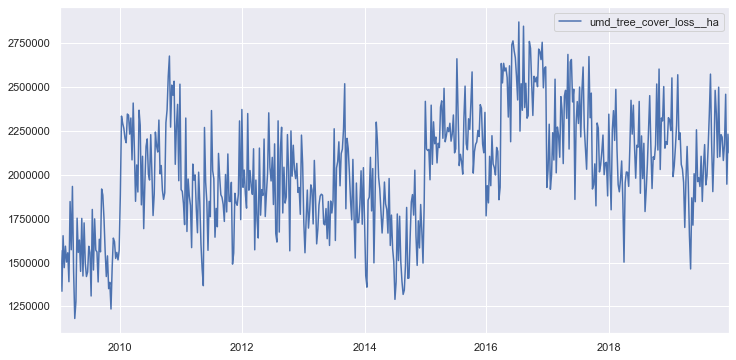

In [551]:
upsampled_df_09_19.plot.line()

In [552]:
upsampled_df_01_08.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/treescover_loss_01_08.csv')

In [553]:
upsampled_df_09_19.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/treescover_loss_09_19.csv')

## yearly -> weekly, 不要刷新！！（仅限比较参考）

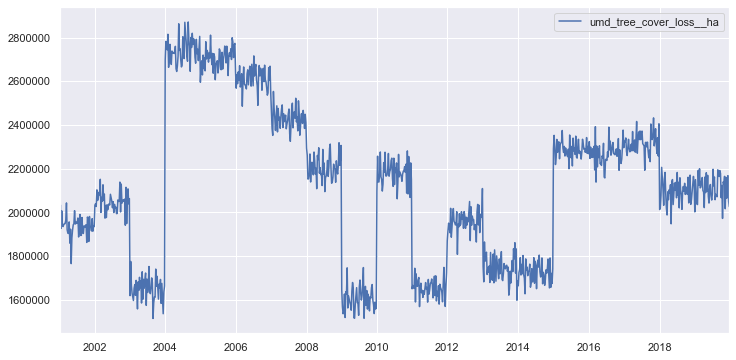

In [15]:
upsampled_df.plot.line()

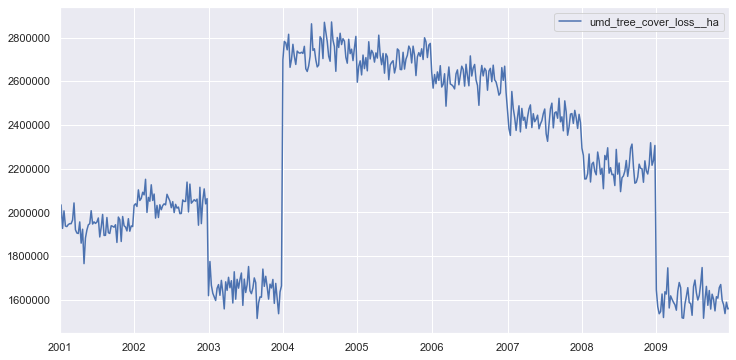

In [16]:
upsampled_df_01_09.plot.line()

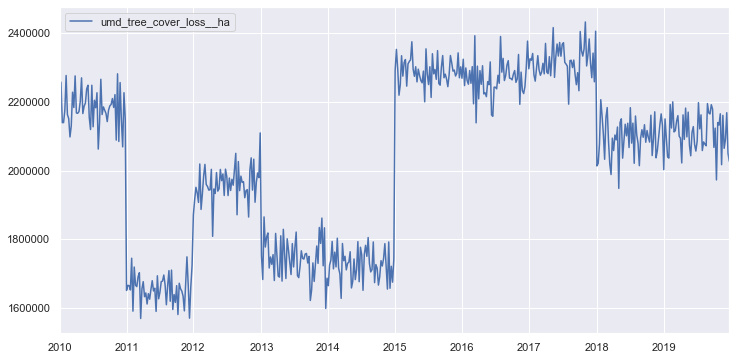

In [17]:
upsampled_df_10_19.plot.line()